In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        %matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the CSV and removing unwanted columns¶

In [4]:
df=pd.read_csv('mxmh_survey_results.csv')

Timestamp,Permissions column is not useful hence dropping it

In [7]:
df.drop(['Timestamp','Permissions'],axis=1,inplace=True)
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


Understanding the dimension of dataset

In [10]:
df.shape

(736, 31)

Understanding the datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

5 number summary of the dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [18]:
df.describe(exclude='number').T

,count,unique,top,freq
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343
Frequency [EDM],736,4,Never,307


Finding the Null values and handling them

In [21]:
df[df.columns[df.isnull().any()]].isnull().sum()

Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64

Deleting entries where null values is less than 10

In [64]:
df.dropna(subset=['Age','Primary streaming service','While working','Instrumentalist','Composer','Foreign languages','Music effects'],inplace=True)

Since BPM has many null values we will replace it with the median value

In [40]:
df[df.columns[df.isnull().any()]].isnull().sum()

Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64

In [42]:
df['BPM']=df['BPM'].fillna(df['BPM'].median())

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,736.0,1.358818e+06,3.686048e+07,0.0,105.0,120.0,140.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


Outlier Detection and Handling¶
Outliers in Age, Hours per day, BPM needs to be corrected

In [47]:
df1=df[['Age','Hours per day','BPM']]

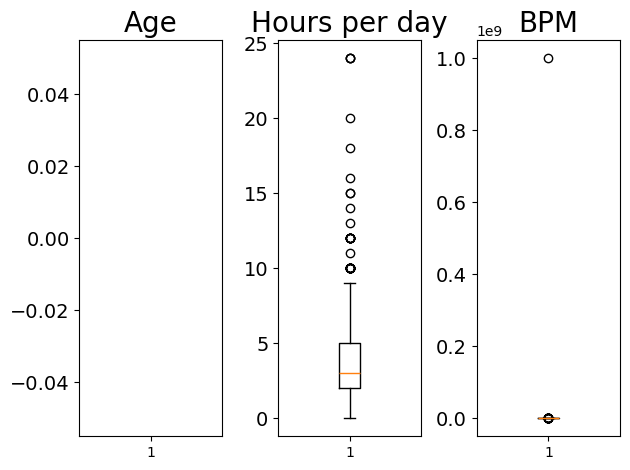

In [49]:
fig,axs=plt.subplots(1,3)
for i,ax in enumerate(axs.flat):
    ax.boxplot(df1.iloc[:,i])
    ax.set_title(df1.columns[i],fontsize=20)
    ax.tick_params(axis='y',labelsize=14)
    
plt.tight_layout()

In [51]:
q3_age = df[['Age']].quantile(0.75)
q1_age = df[['Age']].quantile(0.25)
t_age = q3_age-q1_age
#Upper fence
outliers_above_age = q3_age+3*t_age
#Lower Fence
outliers_below_age = q1_age-3*t_age

q3_hpd = df[['Hours per day']].quantile(0.75)
q1_hpd = df[['Hours per day']].quantile(0.25)
t_hpd = q3_hpd-q1_hpd
#Upper fence
outliers_above_hpd = q3_hpd+3*t_hpd
#Lower Fence
outliers_below_hpd = q1_hpd-3*t_hpd

q3_bpm = df[['BPM']].quantile(0.75)
q1_bpm = df[['BPM']].quantile(0.25)
t_bpm = q3_bpm-q1_bpm
#Upper fence
outliers_above_bpm = q3_bpm+3*t_bpm
#Lower Fence
outliers_below_bpm = q1_bpm-3*t_bpm

In [53]:
print(outliers_above_age)
print(outliers_above_hpd)
print(outliers_above_bpm)

Age    58.0
dtype: float64
Hours per day    14.0
dtype: float64
BPM    245.0
dtype: float64


In [55]:
df_drop=df.copy(deep = True)
df_drop=df_drop.loc[~(df_drop['Age']>58.0)]
df_drop=df_drop.loc[~(df_drop['Hours per day']>14.0)]
df_drop=df_drop.loc[~(df_drop['BPM']>245.0)]

In [57]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,697.0,23.550933,8.795444,10.0,18.0,21.0,26.000,58.0
Hours per day,698.0,3.423066,2.527153,0.0,2.0,3.0,4.875,14.0
BPM,698.0,122.935530,30.930479,0.0,105.0,120.0,140.000,220.0
Anxiety,698.0,5.907593,2.774730,0.0,4.0,6.0,8.000,10.0
Depression,698.0,4.862464,3.014622,0.0,2.0,5.0,7.000,10.0
Insomnia,698.0,3.742837,3.075121,0.0,1.0,3.0,6.000,10.0
OCD,698.0,2.684814,2.862502,0.0,0.0,2.0,5.000,10.0


After removing the outliers and null values the dataset looks more balanced with only 682 records left out of the initial 736.

첨도와 왜도
**첨도 (Kurtosis)**는 확률 분포의 형태를 설명합니다. 이는 분포의 꼬리 부분의 두께를 측정하는 지표입니다.

양의 값: 꼬리가 두껍거나 데이터가 꼬리 부분에 더 많이 분포되어 있음을 나타냅니다.

음의 값: 꼬리가 얇거나 데이터가 꼬리 부분에 덜 분포되어 있음을 나타냅니다.

In [61]:
df_drop.kurtosis(numeric_only  = True)

Age              3.290939
Hours per day    1.866832
BPM              1.159124
Anxiety         -0.716341
Depression      -1.129082
Insomnia        -1.021928
OCD             -0.219282
dtype: float64

왜도 (Skewness)
왜도는 첨도와 유사하게 확률 분포의 형태를 설명합니다. 이는 분포의 비대칭성을 측정하는 지표입니다.

양의 왜도: 오른쪽 꼬리가 더 길다는 것을 나타냅니다.

음의 왜도: 왼쪽 꼬리가 더 길다는 것을 나타냅니다.

In [64]:
df_drop.skew(numeric_only = True)

Age              1.763317
Hours per day    1.396842
BPM              0.137868
Anxiety         -0.449537
Depression      -0.085624
Insomnia         0.404531
OCD              0.916862
dtype: float64

Data Visualization
Correlation Map

In [67]:
import pandas as pd
import numpy as np

# 데이터프레임 생성 예시
# df_drop = pd.DataFrame({...})

# 데이터 유형 확인
print(df_drop.dtypes)

# 숫자형 데이터만 선택
df_drop = df_drop.select_dtypes(include=[np.number])

# 상관관계 계산
corr = df_drop.corr()
print(corr)

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


Data Visualization
- Correlation Map

In [70]:
corr=df_drop.corr()

In [72]:
corr

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.085022,0.035171,-0.133388,-0.039551,0.059536,-0.066921
Hours per day,-0.085022,1.000000,0.048864,0.079936,0.141913,0.150305,0.111844
BPM,0.035171,0.048864,1.000000,0.021571,0.028870,0.041601,-0.034616
Anxiety,-0.133388,0.079936,0.021571,1.000000,0.502146,0.277341,0.341114
Depression,-0.039551,0.141913,0.028870,0.502146,1.000000,0.370904,0.174655
Insomnia,0.059536,0.150305,0.041601,0.277341,0.370904,1.000000,0.223242
OCD,-0.066921,0.111844,-0.034616,0.341114,0.174655,0.223242,1.000000


<Axes: >

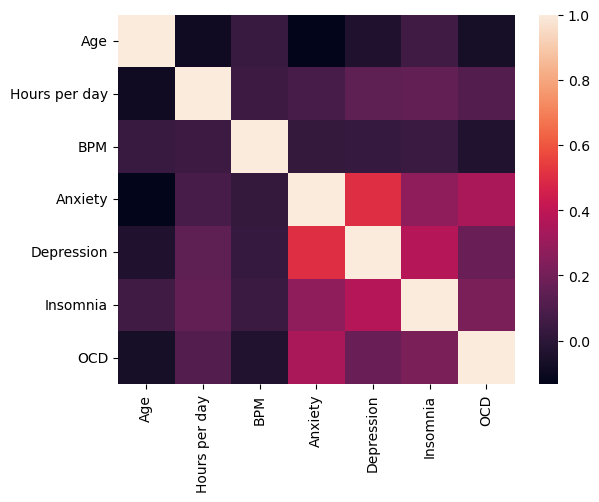

In [74]:
sns.heatmap(corr)

불안과 우울증 사이에는 강한 정적 상관관계가 있습니다.

우울증과 불면증 사이에는 중간 정도의 상관관계가 있습니다.

불안과 OCD 사이에도 중간 정도의 상관관계가 있습니다.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Hours per day'}>,
        <Axes: title={'center': 'BPM'}>],
       [<Axes: title={'center': 'Anxiety'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'Insomnia'}>],
       [<Axes: title={'center': 'OCD'}>, <Axes: >, <Axes: >]],
      dtype=object)

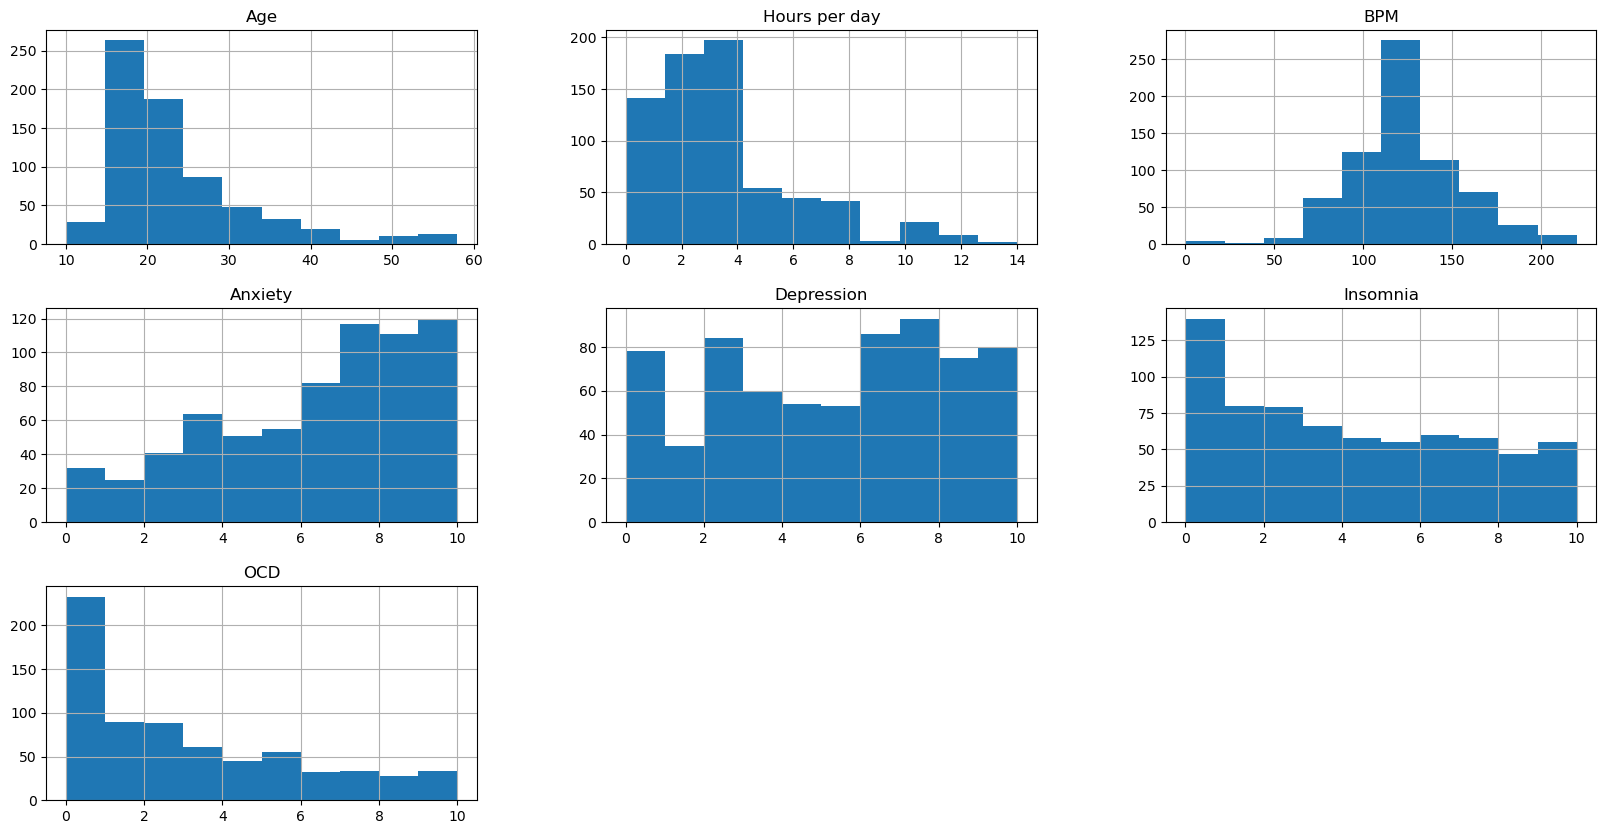

In [77]:
df_drop.hist(figsize=(20,10))

데이터셋은 다음과 같은 특성을 가지고 있습니다:

- 15세에서 25세 사이의 사람들에 대한 데이터가 더 많이 수집되었습니다.
- 대부분의 사람들은 하루에 1-4시간 음악을 듣습니다.
- 분당 비트 수(BPM)는 일반적으로 100-150 사이입니다.
- 데이터셋에 있는 대부분의 사람들은 불안과 우울증을 겪고 있습니다.

In [80]:
print(df_drop.columns.tolist())

['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']


In [82]:
print(df_drop.head())

    Age  Hours per day    BPM  Anxiety  Depression  Insomnia  OCD
0  18.0            3.0  156.0      3.0         0.0       1.0  0.0
2  18.0            4.0  132.0      7.0         7.0      10.0  2.0
4  18.0            4.0  107.0      7.0         2.0       5.0  9.0
5  18.0            5.0   86.0      8.0         8.0       7.0  7.0
6  18.0            3.0   66.0      4.0         8.0       6.0  0.0


In [84]:
df_drop.columns = df_drop.columns.str.strip()  # 공백 제거
df_drop.columns = df_drop.columns.str.lower()  # 소문자 변환

In [86]:
fig = plt.figure(figsize=(8, 4))
sns.countplot(x=df_drop['Primary streaming service'], palette="rainbow")  # 수정된 열 이름 사용
plt.xticks(rotation=75)
plt.show()

KeyError: 'Primary streaming service'

<Figure size 800x400 with 0 Axes>

In [31]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=df_drop['Primary streaming service'],palette="rainbow")
plt.xticks(rotation=75)
plt.show()

NameError: name 'df_drop' is not defined

<Figure size 800x400 with 0 Axes>

In [33]:
print(df_drop.columns.tolist())

NameError: name 'df_drop' is not defined

In [120]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=df_drop['Foreign languages'],palette="rainbow")
plt.xticks(rotation=75)
plt.show()

KeyError: 'Foreign languages'

<Figure size 800x400 with 0 Axes>

KeyError: 'Frequency [Classical]'

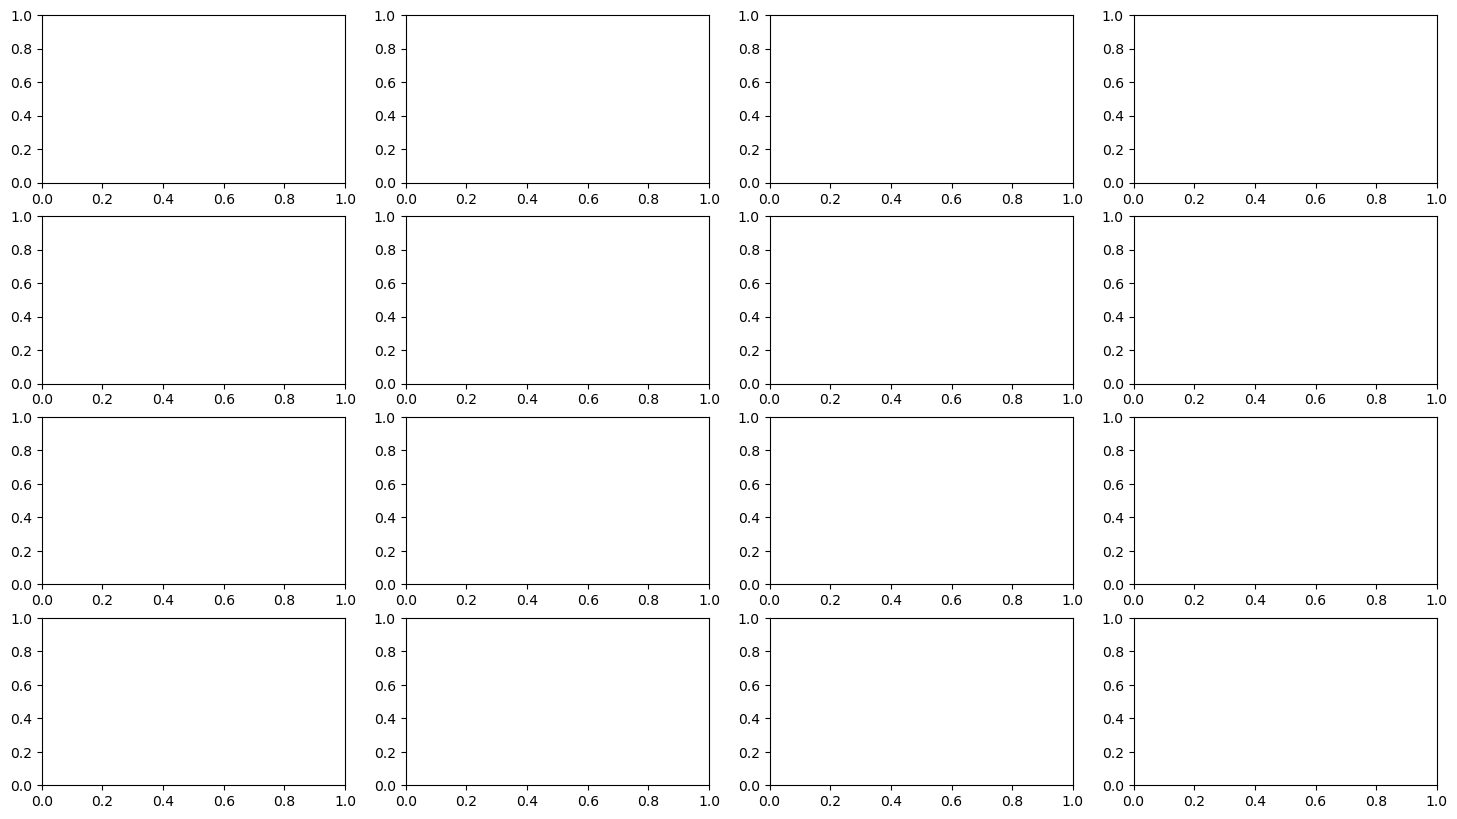

In [122]:
figure,axes=plt.subplots(4,4,figsize=(18,10))
sns.countplot(ax=axes[0,0],x=df_drop['Frequency [Classical]'],palette="rainbow")
sns.countplot(ax=axes[0,1],x=df_drop['Frequency [Country]'],palette="rainbow")

sns.countplot(ax=axes[0,2],x=df_drop['Frequency [EDM]'],palette="rainbow")

sns.countplot(ax=axes[0,3],x=df_drop['Frequency [Folk]'],palette="rainbow")

sns.countplot(ax=axes[1,0],x=df_drop['Frequency [Gospel]'],palette="rainbow")

sns.countplot(ax=axes[1,1],x=df_drop['Frequency [Hip hop]'],palette="rainbow")

sns.countplot(ax=axes[1,2],x=df_drop['Frequency [Jazz]'],palette="rainbow")

sns.countplot(ax=axes[1,3],x=df_drop['Frequency [K pop]'],palette="rainbow")

sns.countplot(ax=axes[2,0],x=df_drop['Frequency [Latin]'],palette="rainbow")

sns.countplot(ax=axes[2,1],x=df_drop['Frequency [Lofi]'],palette="rainbow")

sns.countplot(ax=axes[2,2],x=df_drop['Frequency [Metal]'],palette="rainbow")

sns.countplot(ax=axes[2,3],x=df_drop['Frequency [Pop]'],palette="rainbow")

sns.countplot(ax=axes[3,0],x=df_drop['Frequency [R&B]'],palette="rainbow")

sns.countplot(ax=axes[3,1],x=df_drop['Frequency [Rap]'],palette="rainbow")

sns.countplot(ax=axes[3,2],x=df_drop['Frequency [Rock]'],palette="rainbow")

sns.countplot(ax=axes[3,3],x=df_drop['Frequency [Video game music]'],palette="rainbow")


plt.tight_layout()

In [88]:
fig=plt.figure(figsize=(8,4))
sns.barplot(x=df_drop['Fav genre'],y=df_drop['Age'],palette="rainbow")
plt.xticks(rotation=75)
plt.show()

KeyError: 'Fav genre'

<Figure size 800x400 with 0 Axes>

KeyError: 'Fav genre'

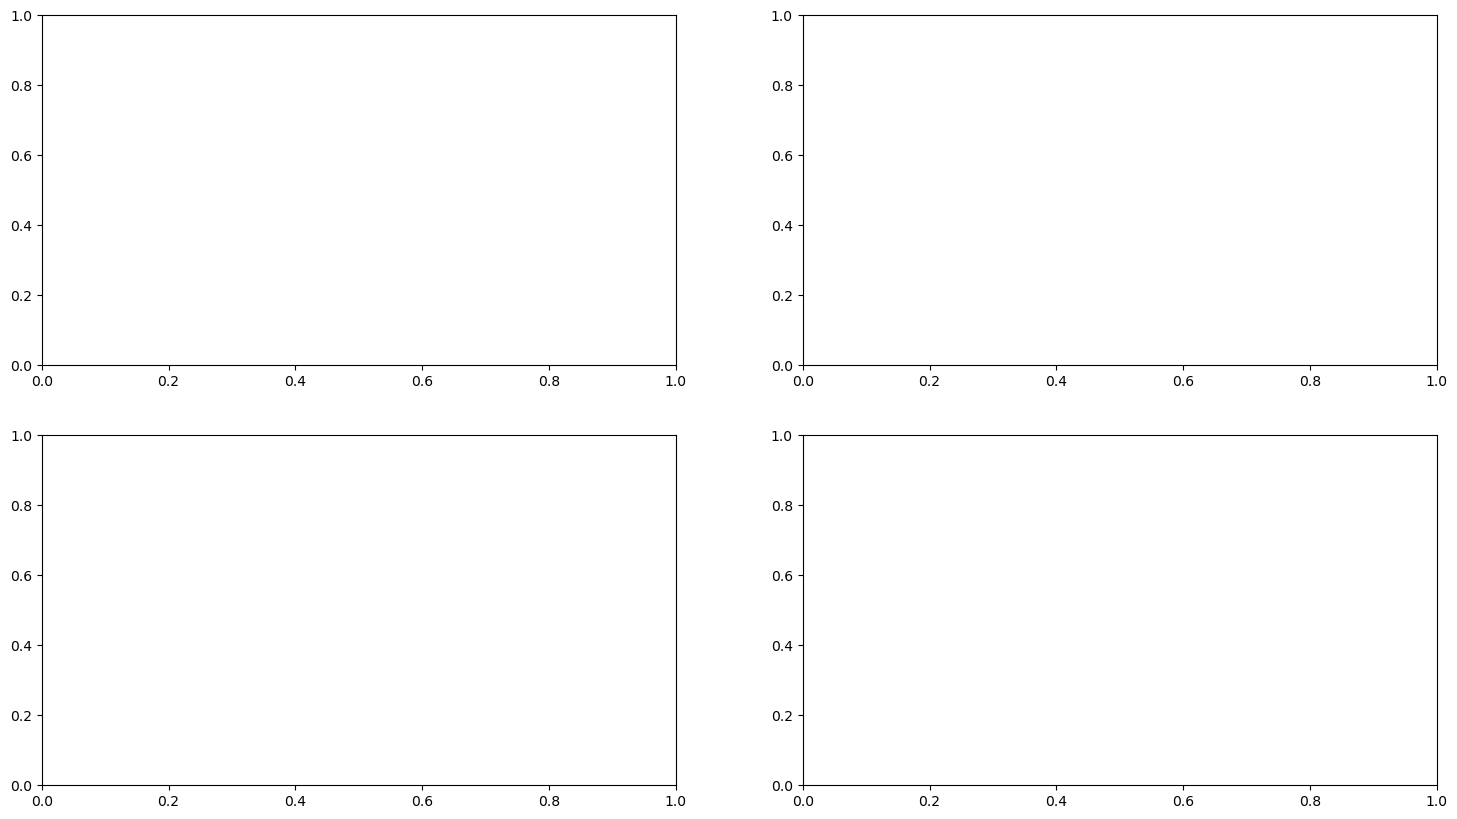

In [90]:
figure,axes=plt.subplots(2,2,figsize=(18,10))
sns.lineplot(ax=axes[0,0],x=df_drop['Fav genre'],y=df_drop['Insomnia'],ci=None)
sns.lineplot(ax=axes[0,1],x=df_drop['Fav genre'],y=df_drop['OCD'],ci=None)
sns.lineplot(ax=axes[1,0],x=df_drop['Fav genre'],y=df_drop['Depression'],ci=None)
sns.lineplot(ax=axes[1,1],x=df_drop['Fav genre'],y=df_drop['Anxiety'],ci=None)
plt.tight_layout()
plt.show()

KeyError: 'Fav genre'

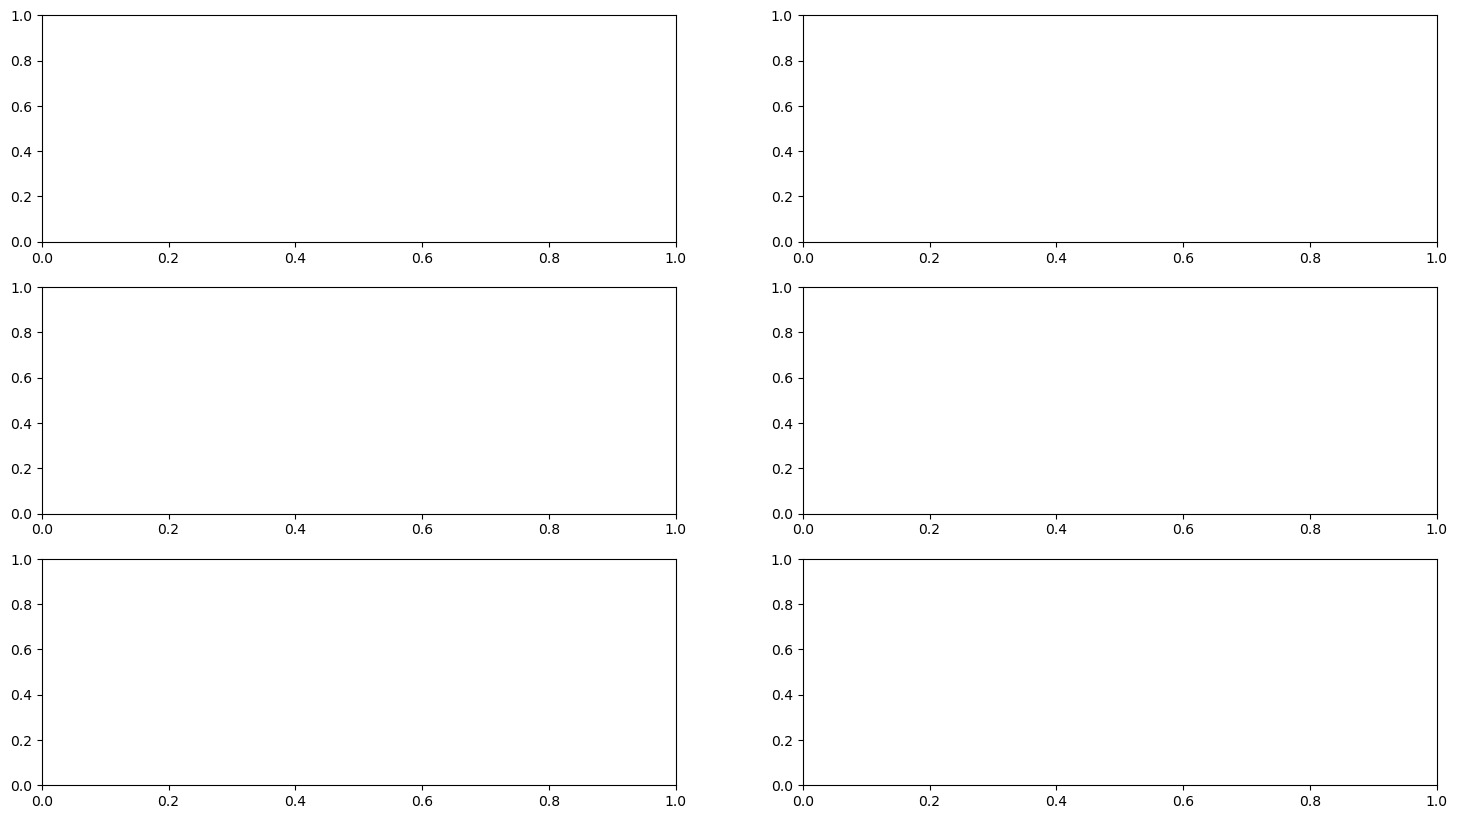

In [92]:
figure,axes=plt.subplots(3,2,figsize=(18,10))
sns.barplot(ax=axes[0,0],x=df_drop['Fav genre'],y=df_drop['Age'],hue=df_drop['Music effects'],palette="rainbow")
sns.barplot(ax=axes[0,1],x=df_drop['Fav genre'],y=df_drop['Hours per day'],hue=df_drop['Music effects'],palette="rainbow")
sns.barplot(ax=axes[1,0],x=df_drop['Fav genre'],y=df_drop['Insomnia'],hue=df_drop['Music effects'],palette="rainbow")
sns.barplot(ax=axes[1,1],x=df_drop['Fav genre'],y=df_drop['OCD'],hue=df_drop['Music effects'],palette="rainbow")
sns.barplot(ax=axes[2,0],x=df_drop['Fav genre'],y=df_drop['Depression'],hue=df_drop['Music effects'],palette="rainbow")
sns.barplot(ax=axes[2,1],x=df_drop['Fav genre'],y=df_drop['Anxiety'],hue=df_drop['Music effects'],palette="rainbow")
plt.tight_layout()
plt.show()